In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Load Dataset into DataFrame

In [2]:
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset loaded successfully!


In [ ]:
print(df.head())
# it printed first 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


### Check Data Types and Missing Values

In [5]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


#### Our dataset is clean and has 0 missing values

## Data Analysis 

In [6]:
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [7]:
grouped = df.groupby('species').mean()
print("\nMean values by species:\n", grouped)



Mean values by species:
             sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


## Data Visualization with Matplotlib 

In [8]:
sns.set(style="whitegrid")


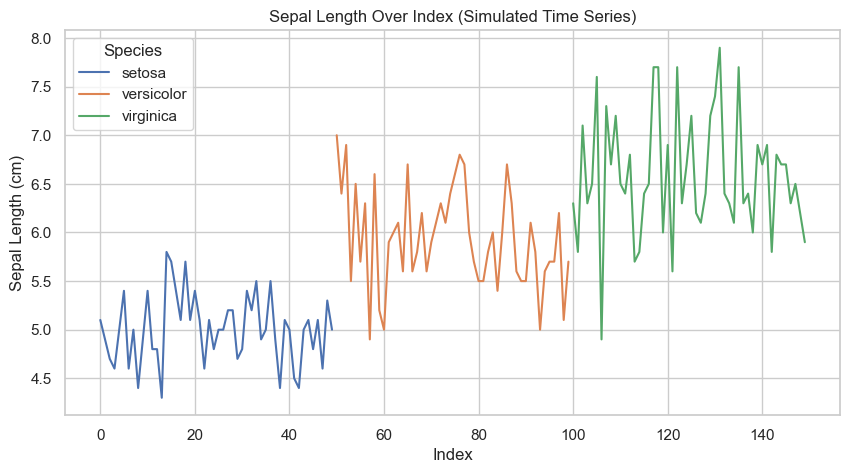

In [9]:
df_line = df.copy()
df_line['index'] = df_line.index
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_line, x='index', y='sepal length (cm)', hue='species')
plt.title('Sepal Length Over Index (Simulated Time Series)')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend(title='Species')
plt.show()


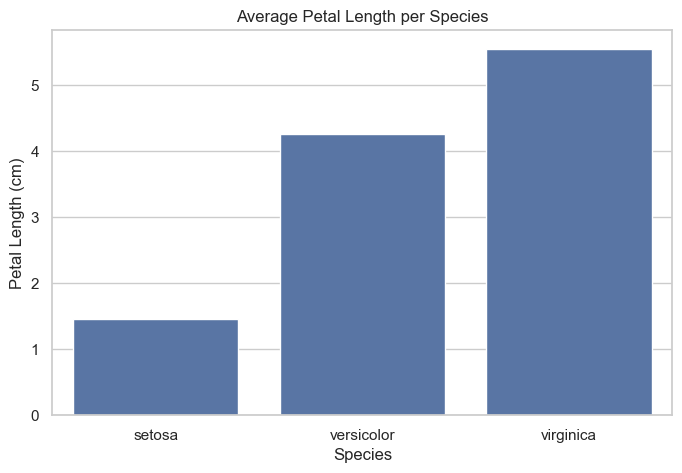

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y=grouped['petal length (cm)'])
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()


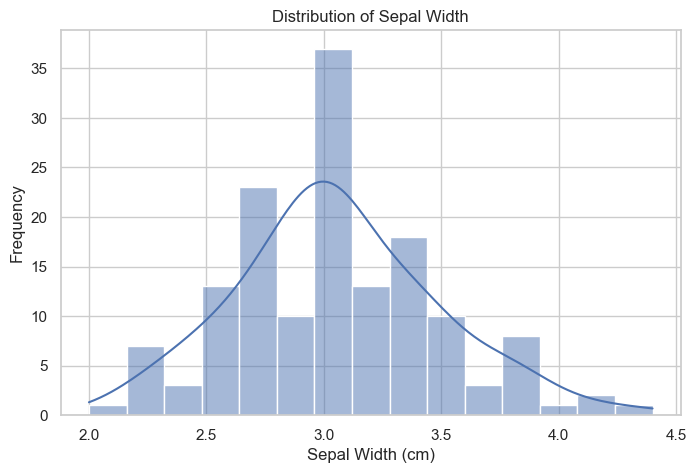

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal width (cm)'], bins=15, kde=True)
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()


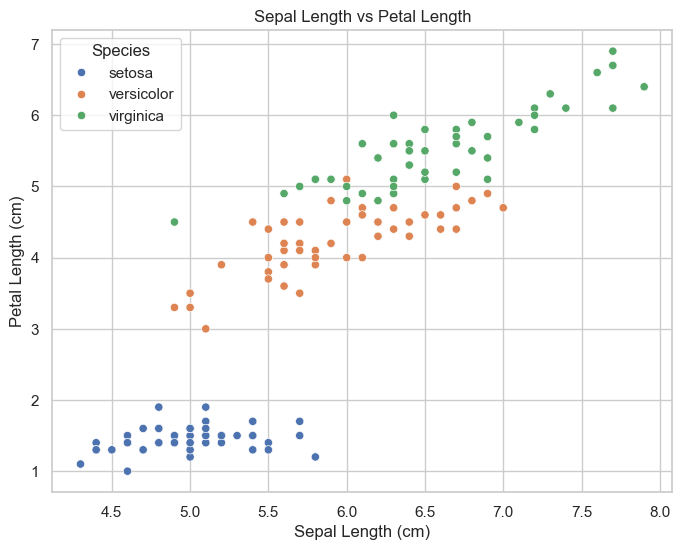

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()
